# Data Enhancement 
                                    TP Introduction
                                    Sacha WANONO and Donélia MONIN
                                    17/09-2020

A report in pairs is to be returned by email no later than 25/09.

## Introduction: 
We can define an image as a 2D function (monochrome image) of the light intensity, u (x, y), depending on the spatial location (x and y are the spatial coordinates).

A digital image is an image whose spatial domain and luminosity have been discretized. We can represent it by a 2D matrix. Each element of the matrix is a pixel, represented by its coordinates (i, j) and its value v = p (i, j), commonly called gray level. The images are most often coded in 256 levels of gray (8-bit coding). This is called the dynamics of the image. This lab uses several images that you can retrieve from Milestone.


In [1]:
# Useful fonctions and imports
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


The imread function of Pyplot allows you to load an image's content and recognizes most of the file formats used in image processing.

1. Import and display the image of Lena with pyplot.

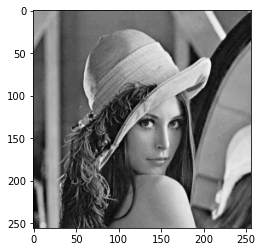

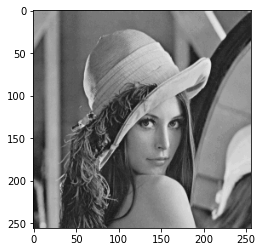

In [2]:
## Insert code here
lena= np.float64(plt.imread('lena_gray_512.tif'))

plt.imshow(lena, cmap='gray')
plt.show()
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)
plt.show()


In [3]:
Commentaire:
Les paramètres vmin et vmax permettent de faire modifier les couleurs de l'image. 
La variation de ces paramètres modifie le nombre de couleurs utilisés pour afficher l'image.



## Histogram
The histogram of an image makes it possible to represent the pixels' probability density within this image.

Let h_u (v) be the function equal to the number of pixels of intensity v within the image u; then we can define the probability density P_u (v) by:
$$
P_u(v)=\frac{h_u(v)}{n_cn_l}
$$

By modifying this density of probability, we play on the characteristics of the image. One can, for example, break down operations of the contrast enhancement type thanks to histogram transformations.

## Simple transformations 
A histogram transformation algorithm looks like this:
    - For each pixel p of the image, read its intensity v.
    - Replace v by T (v).
    
The function T is called histogram transformation.
1. Transform the histogram of the Lena image using the following T fonts:
$$
T(v)= \begin{cases}
255 \text{ si } v>128\\
0 \text{ sinon }
\end{cases}
$$

$$
T(v)=255-v
$$



In [4]:
lena_copy_1 = lena.copy()
lena_copy_2 = lena.copy()

# Thresholding
for r in range(len(lena_copy_1)):
    for p in range(len(lena_copy_1[0])):
        if lena_copy_1[r][p] > 128:
            lena_copy_1[r][p] = 255
        else :
            lena_copy_1[r][p] = 0

# Negative image
for r in range(len(lena_copy_2)):
    for p in range(len(lena_copy_2[0])):
        lena_copy_2[r][p] = 225 - lena_copy_2[r][p]



2. Observe the transformed images and try to name each transformation.

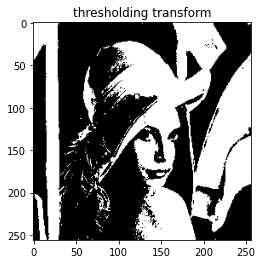

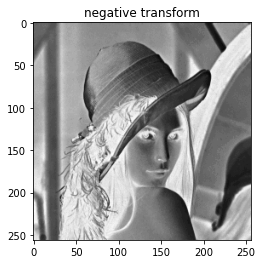

In [5]:
        
plt.imshow(lena_copy_1, cmap='gray')
plt.title('thresholding transform')
plt.show()
        
plt.imshow(lena_copy_2, cmap='gray')
plt.title('negative transform')
plt.show()

## Improved dynamics
1. Display the Clown image


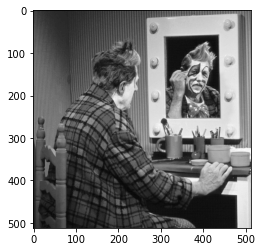

In [6]:
clown = np.float64(plt.imread('CLOWN_LUMI2.bmp'))

plt.imshow(clown, cmap='gray')
plt.show()

We can clearly see that the dynamic of the Clown image is not very important. However, the more the dynamic is spread, the better the quality of the image.

1. By defining a and b as the lower and upper limits respectively of the histogram of the input image, write the function T allowing to use all the dynamics (from 0 to 255) of the image.

In [7]:
a = np.amin(clown)
b = np.amax(clown)

def dynamics_expanse(img):
    img_c = img.copy()
    for r in range(len(img_c)):
        for p in range(len(img_c[0])):
            img_c[r][p] = 255*( (img_c[r][p] - a) / (b - a))
    return img_c;


2. Apply this transformation to the clown image and comment on the result. Display the corresponding histograms.

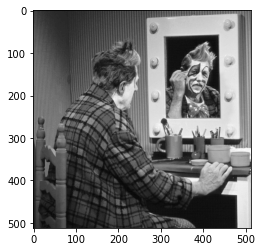

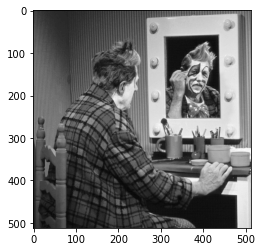

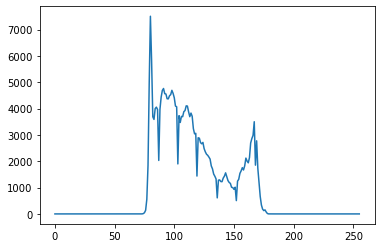

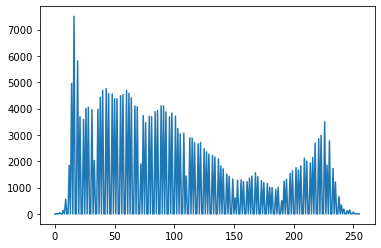

In [8]:
clown_expanse = dynamics_expanse(clown)

plt.imshow(clown, cmap='gray')
plt.show()

plt.imshow(clown_expanse, cmap='gray')
plt.show()


hist_o = np.histogram(clown.ravel(), 256, [0,256])

plt.figure()
plt.plot(hist_o[0])
plt.show()

hist_e = np.histogram(clown_expanse.ravel(), 256, [0,256])
plt.figure()
plt.plot(hist_e[0])
plt.show()

**Comment here**

On observe un histogramme étalé sur l'entièreté des valeurs en conservant la même 'forme' de l'histogramme

### Cumulative histogram

The cumulative histogram is a histogram that considers all the pixels whose value is less than or equal to the current gray level. This number is normalized by dividing by the total number of pixels.

Its best-known application is the histogram equalization, which consists of making the probability density of the pixels, P_u (v), tend towards a uniform law (we "spread" the histogram). This is obtained via the following transformation:

$$
T(v) = 255H_c(v)
$$
ou H_c is the cumulative histogram. 

1. Apply this transformation on the previous image and comment.

In [9]:

def H_equalization(img):
    img_c = img.copy()
    
    hist = np.histogram(img.ravel(), 256, [0,256])
    hist_c = np.cumsum(hist[0]) # Cumulative Histogram
    hist_normalized =  hist_c / img.size # Cumulative Histogram's maximum is the nb of pixels
    
    for r in range(len(img_c)):
        for p in range(len(img_c[0])):
            img_c[r][p] = 255 * hist_normalized[int(img_c[r][p])]
    return img_c


            
    

2. Check the histogram of the output image to visualize the equalization operation.

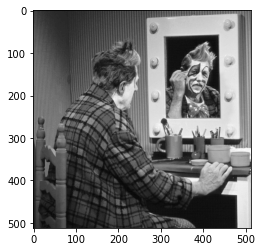

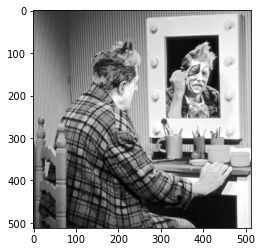

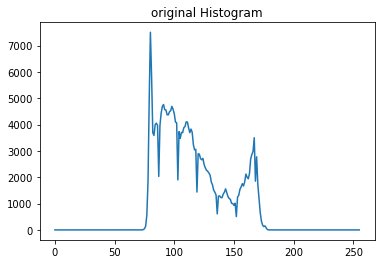

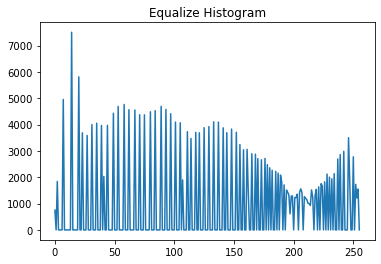

In [10]:
clown_equalize = H_equalization(clown)

plt.imshow(clown, cmap='gray')
plt.show()

plt.imshow(clown_equalize, cmap='gray')
plt.show()


plt.figure()
plt.plot(hist_o[0])
plt.title('original Histogram')
plt.show()

hist_eq = np.histogram(clown_equalize.ravel(), 256, [0,256])
plt.figure()
plt.plot(hist_eq[0])
plt.title('Equalize Histogram')
plt.show()


**Commentaire :** On se rend bien compte que l'égalisation de l'histogramme joue un rôle majeur dans le contraste de l'image (voir l'image égaliser ci-dessus). L'entièreté de l'histogram est utilisé en répartissant les intensités (contrairement à l'expansion d'histogramme).

# Filtering
## Definitions
Filtering is an operation often used in image processing. For example, filtering makes it possible to reduce the image's noise. This filtering can be linear or nonlinear.

In the case of a linear filter, the filtering operation can be carried out using a convolution product. Let h be the convolution filter or mask, the convolution operation 
$$
w=u*h
$$
is defined in discrete by:
$$
w(i,j)=\sum_{n=1}^{n_l}\sum_{m=1}^{n_c} u(n,m)h(i-n,j-m)
$$
we consider here that h is periodic outside of ${1,..., n_l}x {1,...,n_c}$.

The function (python function TO FIND) makes it possible to carry out the operation of filtering the image u by the convolution mask h.

The most used nonlinear filtering is the median filter. This filter replaces the value of a pixel with the median of the values of its neighbors. This filtering consists of:

- Find and order the neighbors' values of the current pixel v (according to a mask with a size of K * K).
- Select the value located on the median and replace v by this value.

## Applications
1. Define the following convolution masks:
$$
h_1=\frac{1}{9} \left[\begin{matrix}
1 & 1 & 1 \\
1 & 1 & 1\\
1 & 1 & 1
\end{matrix}\right] \quad h_2= \left[\begin{matrix}
0 & 1 & 0 \\
1 & -4 & 1\\
0 & 1 & 0
\end{matrix}\right]
$$

In [11]:
h1 = 1/9 * np.ones((3,3))
h2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

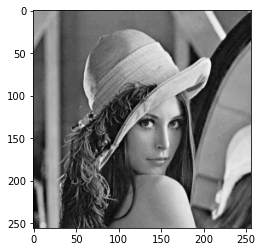

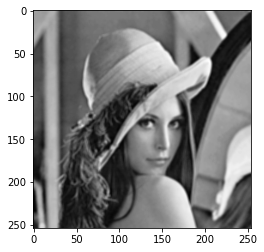

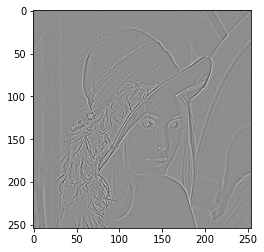

In [12]:
from scipy import signal

lena_c = lena.copy()

lena_h1 = signal.convolve2d(lena_c, h1, "valid")
lena_h2 = signal.convolve2d(lena_c, h2, "valid")


plt.imshow(lena, cmap='gray')
plt.show()

plt.imshow(lena_h1, cmap='gray')
plt.show()


plt.imshow(lena_h2, cmap='gray')
plt.show()

2. Comment on the image filtered by these convolution masks. The starting image can be the image of Lena.

We can see that the h1 mask blur the image by doing the convolution. The h2 mask seem to bring out the contour of Lena as a Sobel filter.

One of the applications where filtering is widely used is noise attenuation. Noise is an alteration of the image: All the relevant information in the image is not simply accessible. Filtering, therefore, consists in finding as much information as possible in the noisy image. Some filters are recommended depending on the type of noise.
4. Load the image Lena and noise it by adding an additive and random noise following a Gaussian distribution with zero mean and standard deviation 20.

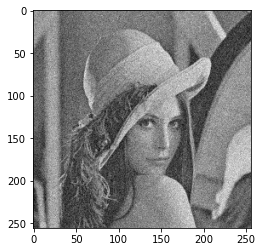

In [13]:
def apply_gaussian_noise(image):
    mu, sigma = 0, 20
    random_gaussian_noise = np.random.normal(mu, sigma, 256**2)
    random_gaussian_noise = np.array(random_gaussian_noise)
    random_gaussian_noise = random_gaussian_noise.reshape(256,256)
    img = image + random_gaussian_noise
    return img

lena_noise = apply_gaussian_noise(lena)
plt.imshow(lena_noise,cmap="gray")

5. Observe the output image of the averaging filter and the median filter, then comment.

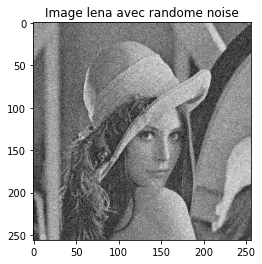

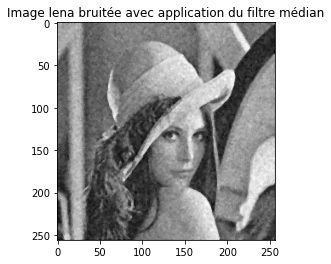

In [14]:

#median filter

lena_noise_median = signal.medfilt(lena_noise)
#Plot images
plt.imshow(lena_noise,cmap='gray')
plt.title("Image lena avec randome noise")
plt.show()
plt.imshow(lena_noise_median, cmap = 'gray')
plt.title("Image lena bruitée avec application du filtre médian")
plt.show()



**comment :** Median filter is useful to reduce noise by bluring the image. This technical involve to decrease the image's quality.

6. Proceed in the same way by noising the image with "salt and pepper" noise (probability 10%) using a python function (TO FIND).


<ipython-input-15-704dcda70e52>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-15-704dcda70e52>:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


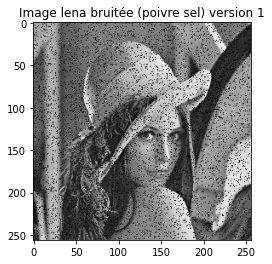

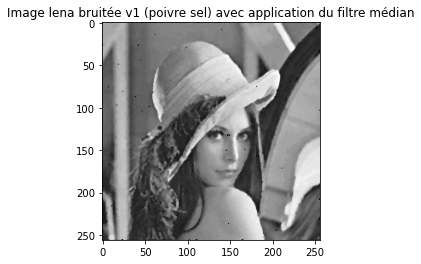

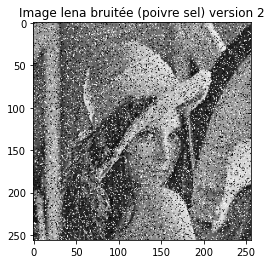

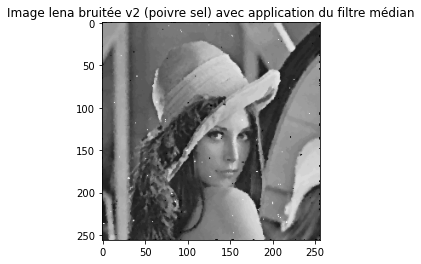

In [15]:
# version 1
def salt_and_pepper():
    image = lena 
    row,col = image.shape
    s_vs_p = 0.5
    amount = 0.1
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
        for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    out[coords] = 0
    return out

lena_s_and_p_v1 = salt_and_pepper();

# version 2
def add_salt_and_pepper_noise(clean_image,lower_proba,upper_proba):
    noisy_image=clean_image.copy()
    noise = np.random.random(clean_image.shape)
    noisy_image[noise > upper_proba] = 255
    noisy_image[noise < lower_proba] = 0
    return(noisy_image)

lena_s_and_p_v2 = add_salt_and_pepper_noise(lena,0.1,0.9)


#median filter

lena_s_and_p_median_v1 = signal.medfilt(lena_s_and_p_v1)
lena_s_and_p_median_v2  = signal.medfilt(lena_s_and_p_v2)

#Plot images
plt.figure()
plt.imshow(lena_s_and_p_v1, cmap = 'gray')
plt.title("Image lena bruitée (poivre sel) version 1")
plt.show()

plt.figure()
plt.imshow(lena_s_and_p_median_v1, cmap = 'gray')
plt.title("Image lena bruitée v1 (poivre sel) avec application du filtre médian")
plt.show()

plt.figure()
plt.imshow(lena_s_and_p_v2, cmap = 'gray')
plt.title("Image lena bruitée (poivre sel) version 2")
plt.show()

plt.figure()
plt.imshow(lena_s_and_p_median_v2, cmap = 'gray')
plt.title("Image lena bruitée v2 (poivre sel) avec application du filtre médian")
plt.show()


7. Comment

In all the case, despite a lot of noise (salt and pepper). The median filter correct the noise brilliantly ! In fact the median filter blur the image so the noise is melt into the image.

# Fourier transform
## Definitions
The Fourier transform makes it possible to represent temporal information (spatial in 2D) in frequency information. The discrete 2D Fourier transformation is written:
$$
\hat{u} (v,w) = \frac{1}{n_l n_c} \sum_{n=0}^{n_l-1}\sum_{m=0}^{n_c-1} u(n,m)\exp^{-j2\pi\left(\frac{vn}{n_c}+\frac{wm}{n_l}\right)}
$$
We usually represent the logarithm (to accentuate the contrast) of the modulus of the "refocused" Fourier transform using the fftshift function.

Calculate the Fourier transform (python function TO FIND) of the Lena image and display its module.

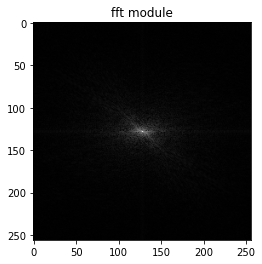

In [16]:

fft = np.fft.fft2(lena)
fft_center = np.fft.fftshift(np.abs(fft))

fft_normalize = 255 * (fft_center.real - fft_center.real.min() ) / fft_center.real.max()
fft_normalize_log = 255 * np.log(1 + fft_normalize) / np.log(1 + fft_normalize).max()

plt.figure()
plt.imshow(fft_normalize_log, cmap = cm.gray)
plt.title('fft module')
plt.show()

#### 4.2 Frequency filtering

As previously, we will perform a filtering operation but in the frequency domain this time. This is done in 3 steps.
1. Calculation of the Fourier transforms of the image u and of the filter h.
2. Term-to-term multiplication in the frequency domain.
3. Inverse transform.

Create a square mask h, containing only 1s, of size 5 X 5. Normalize this filter then calculate and display its Fourier transform.



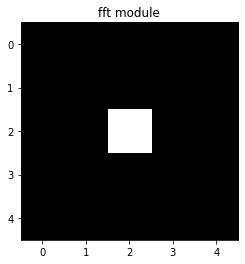

In [17]:
h = np.ones((5,5))*(1/25)
h_fft = np.fft.fft2(h)
h_fft_module = np.abs(h_fft)
h_fft_shift = np.fft.fftshift(h_fft_module)

fft_normalize = 255 * (h_fft_shift.real - h_fft_shift.real.min() ) / h_fft_shift.real.max()
fft_normalize_log = 255 * np.log(1 + fft_normalize) / np.log(1 + fft_normalize).max() 

plt.figure()
plt.imshow(fft_normalize_log, cmap = cm.gray)
plt.title('fft module')
plt.show()

What is this type of filter?

In [ ]:
Il s'agit d'un filtre passe-bas(filtre moyenneur de taille 5x5 normalisé).

Perform filtering as described above.

In [20]:
fft_h_resized = np.fft.fft2(h,s=(256,256))
lena_h = fft*fft_h_resized
lena_out = np.fft.ifft2(lena_h)
lena_out = np.abs(lena_out)

Check the result and comment.

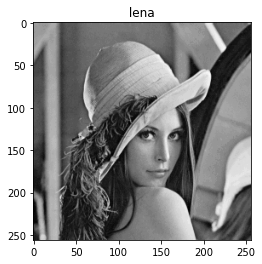

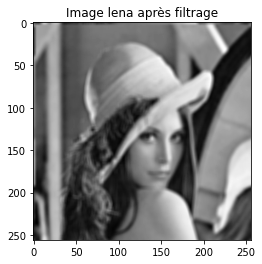

In [22]:
plt.imshow(lena,cmap='gray')
plt.title("lena")
plt.show()
plt.imshow(lena_out, cmap='gray')
plt.title("Image lena après filtrage")
plt.show()

In [ ]:
Lorsque nous appliquons le filtre sur l'image, nous constatons que l'image est beaucoup plus floue que l'image originelle.
Cela est du à l'application d'un masque de plus grande taile 5x5.
